# Super Market Sale

In [52]:
import pandas as pd 
import matplotlib.pyplot as plt 
from datetime import datetime 
import seaborn as sns

In [53]:
df=pd.read_csv("datasets/sales/supermarket_sales - Sheet1.csv")
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1


In [54]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Invoice ID               1000 non-null   object 
 1   Branch                   1000 non-null   object 
 2   City                     1000 non-null   object 
 3   Customer type            1000 non-null   object 
 4   Gender                   1000 non-null   object 
 5   Product line             1000 non-null   object 
 6   Unit price               1000 non-null   float64
 7   Quantity                 1000 non-null   int64  
 8   Tax 5%                   1000 non-null   float64
 9   Total                    1000 non-null   float64
 10  Date                     1000 non-null   object 
 11  Time                     1000 non-null   object 
 12  Payment                  1000 non-null   object 
 13  cogs                     1000 non-null   float64
 14  gross margin percentage  

In [55]:
df.isna().sum()

Invoice ID                 0
Branch                     0
City                       0
Customer type              0
Gender                     0
Product line               0
Unit price                 0
Quantity                   0
Tax 5%                     0
Total                      0
Date                       0
Time                       0
Payment                    0
cogs                       0
gross margin percentage    0
gross income               0
Rating                     0
dtype: int64

In [56]:
df_trend=df.groupby('Date').sum()['Rating'].reset_index()
df_trend

,Date,Rating
0,1/1/2019,79.0
1,1/10/2019,54.6
2,1/11/2019,56.8
3,1/12/2019,75.3
4,1/13/2019,67.2
...,...,...
84,3/5/2019,114.3
85,3/6/2019,79.3
86,3/7/2019,62.9
87,3/8/2019,83.8


C:\Users\KIRANA~1\AppData\Local\Temp/ipykernel_9044/1947449151.py:4: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Heiti TC'] not found. Falling back to DejaVu Sans.


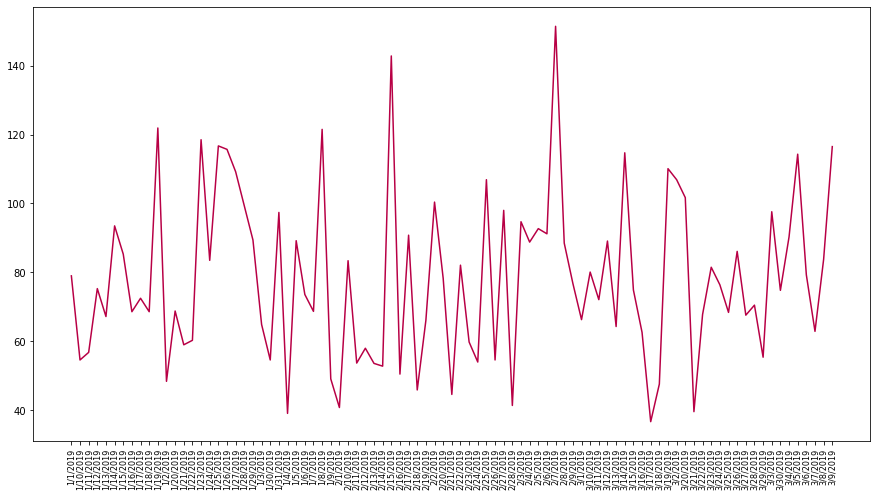

In [57]:
plt.figure(figsize=(15,8))
plt.plot(df_trend['Date'],df_trend['Rating'],color='#b80045')
plt.xticks(rotation='vertical',size=8)
plt.show()

In [58]:
df_product=pd.DataFrame(df.groupby('Product line').sum()['Rating'])
df_product=df_product.sort_values('Rating',ascending=False)
df_product

,Rating
Product line,
Fashion accessories,1251.2
Food and beverages,1237.7
Electronic accessories,1177.2
Sports and travel,1148.1
Home and lifestyle,1094.0
Health and beauty,1064.5


In [59]:
df_mostsell=pd.DataFrame(df.groupby('Product line').sum()['Quantity'])
df_mostsell.sort_values('Quantity',ascending=False)

,Quantity
Product line,
Electronic accessories,971
Food and beverages,952
Sports and travel,920
Home and lifestyle,911
Fashion accessories,902
Health and beauty,854


D:\Juypitor\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\KIRANA~1\AppData\Local\Temp/ipykernel_9044/3770622106.py:3: UserWarning: Matplotlib is currently using agg, which is a non-GUI backend, so cannot show the figure.
  plt.show()


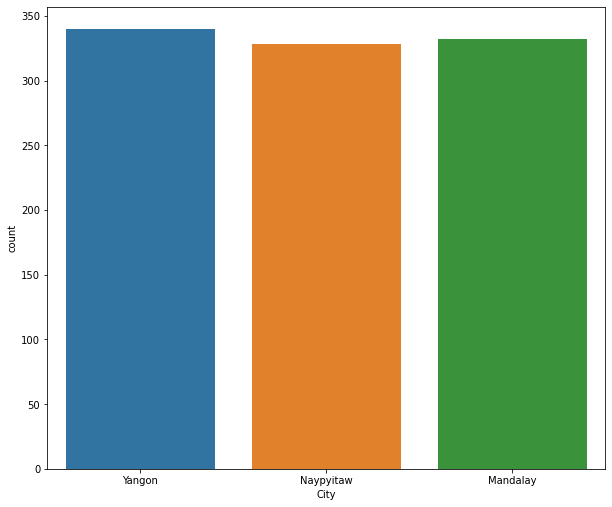

In [60]:
plt.figure(figsize=(10,8.5))
sns.countplot(df['City'])
plt.show()

In [61]:
df['Product line']

0           Health and beauty
1      Electronic accessories
2          Home and lifestyle
3           Health and beauty
4           Sports and travel
                ...          
995         Health and beauty
996        Home and lifestyle
997        Food and beverages
998        Home and lifestyle
999       Fashion accessories
Name: Product line, Length: 1000, dtype: object

In [62]:
df.groupby(['City','Gender']).count()

Invoice ID  Branch  Customer type  Product line  Unit price  \
City      Gender                                                                
Mandalay  Female         162     162            162           162         162   
          Male           170     170            170           170         170   
Naypyitaw Female         178     178            178           178         178   
          Male           150     150            150           150         150   
Yangon    Female         161     161            161           161         161   
          Male           179     179            179           179         179   

                  Quantity  Tax 5%  Total  Date  Time  Payment  cogs  \
City      Gender                                                       
Mandalay  Female       162     162    162   162   162      162   162   
          Male         170     170    170   170   170      170   170   
Naypyitaw Female       178     178    178   178   178      178   178   
          Male         150     150    150   150   150      150   150   
Yangon    Female       161     161    161   161   161      161   161   
          Male         179     179    179   179   179      179   179   

                  gross margin percentage  gross income  Rating  
City      Gender                                                 
Mandalay  Female                      162           162     162  
          Male                        170           170     170  
Naypyitaw Female                      178           178     178  
          Male                        150           150     150  
Yangon    Female                      161           161     161  
          Male                        179           179     179

In [63]:
female_Shopper=df.groupby(['Gender','City']).count()['Customer type']
female_Shopper

Gender  City     
Female  Mandalay     162
        Naypyitaw    178
        Yangon       161
Male    Mandalay     170
        Naypyitaw    150
        Yangon       179
Name: Customer type, dtype: int64

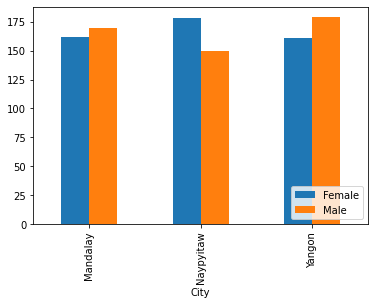

In [64]:
female_Shopper.unstack(level=0).plot(kind='bar')
plt.legend(loc='lower right')

In [65]:
df.groupby('Gender').sum()

,Unit price,Quantity,Tax 5%,Total,cogs,gross margin percentage,gross income,Rating
Gender,,,,,,,,
Female,27687.24,2869,7994.425,167882.925,159888.50,2385.714286,7994.425,3489.2
Male,27984.89,2641,7384.944,155083.824,147698.88,2376.190476,7384.944,3483.5


<AxesSubplot:xlabel='Gender'>

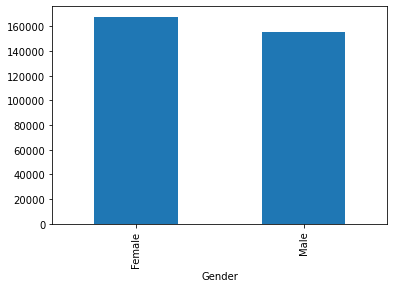

In [66]:
spend=df.groupby('Gender').sum()['Total']
spend.plot(kind='bar')

<AxesSubplot:xlabel='Customer type'>

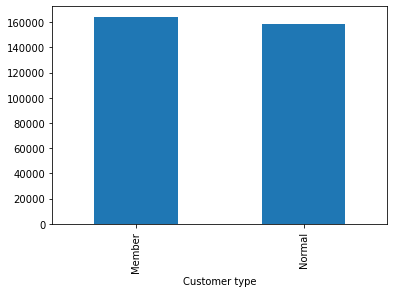

In [67]:
member=df.groupby('Customer type').sum()['Total']
member.plot(kind='bar')

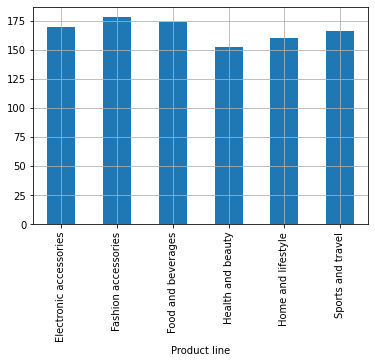

In [68]:
category=df.groupby('Product line').count()['Invoice ID']
category.plot(kind='bar')
plt.grid()

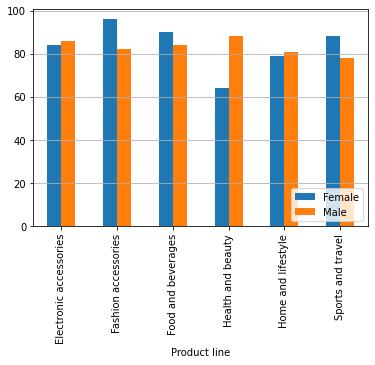

In [69]:
sales_gender=df.groupby(['Gender','Product line']).count()['Invoice ID']
sales_gender.unstack(level=0).plot(kind='bar')
plt.legend(loc='lower right')
plt.grid(axis='y')

In [70]:
df['Date']

0       1/5/2019
1       3/8/2019
2       3/3/2019
3      1/27/2019
4       2/8/2019
         ...    
995    1/29/2019
996     3/2/2019
997     2/9/2019
998    2/22/2019
999    2/18/2019
Name: Date, Length: 1000, dtype: object

In [71]:
df['day']=pd.to_datetime(df['Date']).dt.day
df['month']=pd.to_datetime(df['Date']).dt.month
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2


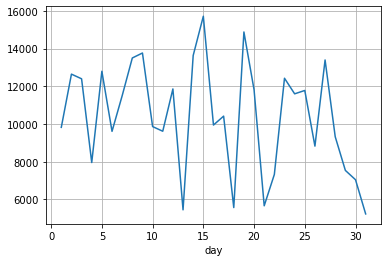

In [72]:
df.groupby('day').sum()['Total'].plot()
plt.grid()

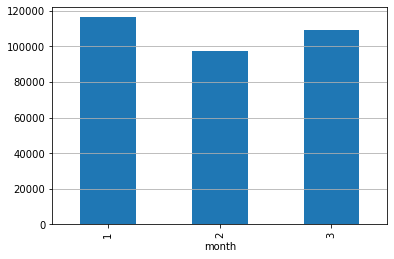

In [73]:
df.groupby('month').sum()['Total'].plot(kind='bar')
plt.grid(axis='y')

In [74]:
df['hour']=pd.to_datetime(df['Time']).dt.hour
df

,Invoice ID,Branch,City,Customer type,Gender,Product line,Unit price,Quantity,Tax 5%,Total,Date,Time,Payment,cogs,gross margin percentage,gross income,Rating,day,month,hour
0,750-67-8428,A,Yangon,Member,Female,Health and beauty,74.69,7,26.1415,548.9715,1/5/2019,13:08,Ewallet,522.83,4.761905,26.1415,9.1,5,1,13
1,226-31-3081,C,Naypyitaw,Normal,Female,Electronic accessories,15.28,5,3.8200,80.2200,3/8/2019,10:29,Cash,76.40,4.761905,3.8200,9.6,8,3,10
2,631-41-3108,A,Yangon,Normal,Male,Home and lifestyle,46.33,7,16.2155,340.5255,3/3/2019,13:23,Credit card,324.31,4.761905,16.2155,7.4,3,3,13
3,123-19-1176,A,Yangon,Member,Male,Health and beauty,58.22,8,23.2880,489.0480,1/27/2019,20:33,Ewallet,465.76,4.761905,23.2880,8.4,27,1,20
4,373-73-7910,A,Yangon,Normal,Male,Sports and travel,86.31,7,30.2085,634.3785,2/8/2019,10:37,Ewallet,604.17,4.761905,30.2085,5.3,8,2,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,233-67-5758,C,Naypyitaw,Normal,Male,Health and beauty,40.35,1,2.0175,42.3675,1/29/2019,13:46,Ewallet,40.35,4.761905,2.0175,6.2,29,1,13
996,303-96-2227,B,Mandalay,Normal,Female,Home and lifestyle,97.38,10,48.6900,1022.4900,3/2/2019,17:16,Ewallet,973.80,4.761905,48.6900,4.4,2,3,17
997,727-02-1313,A,Yangon,Member,Male,Food and beverages,31.84,1,1.5920,33.4320,2/9/2019,13:22,Cash,31.84,4.761905,1.5920,7.7,9,2,13
998,347-56-2442,A,Yangon,Normal,Male,Home and lifestyle,65.82,1,3.2910,69.1110,2/22/2019,15:33,Cash,65.82,4.761905,3.2910,4.1,22,2,15


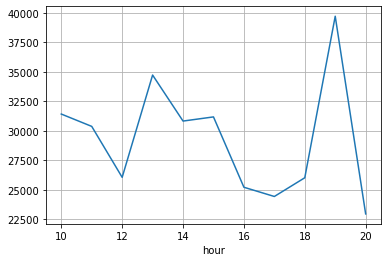

In [75]:
df.groupby('hour').sum()['Total'].plot()
plt.grid()

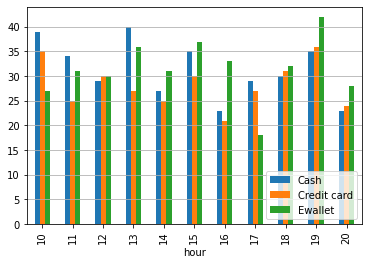

In [76]:
df.groupby(['Payment','hour']).count()['Customer type'].unstack(level=0).plot(kind='bar')
plt.grid(axis='y')
plt.legend(loc='lower right')

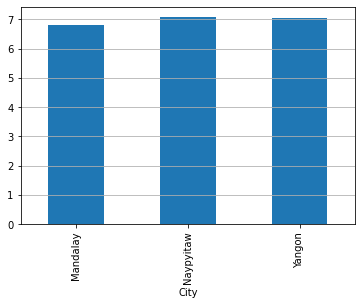

In [77]:
rating=df.groupby('City').mean()['Rating']
rating.plot(kind='bar')
plt.grid(axis='y')

# BigMarket Sales

In [78]:
bigmarket_train=pd.read_csv('datasets/sales/train.csv')
bigmarket_test=pd.read_csv('datasets/sales/Test.csv')

In [79]:
bigmarket_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [80]:
bigmarket_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [81]:
bigmarket_train.isna().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [82]:
bigmarket_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,7060.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.643456,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,8.773750,0.026989,93.826500,1987.000000,834.247400
50%,12.600000,0.053931,143.012800,1999.000000,1794.331000
75%,16.850000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [83]:
bigmarket_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [84]:
bigmarket_train['Item_Weight'].fillna(bigmarket_train['Item_Weight'].mean(),inplace=True)
bigmarket_test['Item_Weight'].fillna(bigmarket_test['Item_Weight'].mean(),inplace=True)

In [85]:
bigmarket_train['Outlet_Size'].fillna(bigmarket_train['Outlet_Size'].mode(),inplace=True)
bigmarket_test['Outlet_Size'].fillna(bigmarket_test['Outlet_Size'].mode(),inplace=True)

In [86]:
bigmarket_train.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)
bigmarket_test.drop(['Item_Identifier','Outlet_Identifier'],axis=1,inplace=True)

In [89]:
import dtale

dtale.show(bigmarket_train)

TypeError: <class 'numpy.typing._dtype_like._SupportsDType'> is not a generic class